## Case Study 1(House Prices)

Data fields
Here's a brief version of what you'll find in the data description file.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

### 1.1 import some necessary librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 import and put the train and test datasets in  pandas dataframe

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')


### 1.3 display the first five rows of the train dataset.

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1.4 display the first five rows of the test dataset.

In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 1.5 check the numbers of samples and features

In [10]:
df_train.shape[0]

1460

In [11]:
df_train.shape[1]

81

### 1.6 Save the 'Id' column

In [14]:
df1=df_train['Id']
df1.head()

0    1
1    2
2    3
3    4
4    5
Name: Id, dtype: int64

### 1.7 Now drop the  'Id' colum since it's unnecessary for  the prediction process.

In [17]:
df_train.drop(columns=['Id'],inplace=True)
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1.8 check again the data size after dropping the 'Id' variable

In [18]:
df_train.size

116800

## 1.9 Data Processing

### 1.9a) Check the Outliers for  train['GrLivArea'],  train['SalePrice']. And your observation?

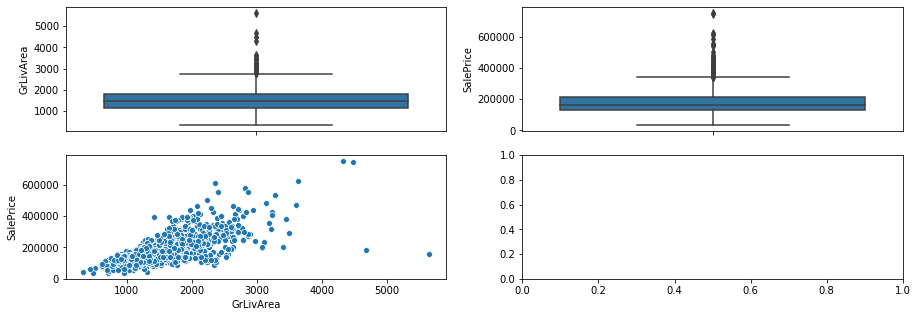

In [36]:
# create subplots 
f,ax=plt.subplots(2,2,figsize=(15,5))  # we can change the size of graph here 
sns.boxplot(y=df_train['GrLivArea'],ax=ax[0,0])
sns.boxplot(y=df_train['SalePrice'],ax=ax[0,1])
sns.scatterplot(x=df_train['GrLivArea'],y=df_train['SalePrice'],ax=ax[1,0])
#create scatter plots for train['GrLivArea'],  train['SalePrice']
plt.show()

#### observation:


### 1.9 b) Deleting outliers.And your observation?

In [43]:
q1=df_train['GrLivArea'].describe()['25%']
q3=df_train['GrLivArea'].describe()['75%']
iqr=q3-q1
uL=q3+1.5*iqr
lL=q1-1.5*iqr
df_train_new_g=df_train[(df_train['GrLivArea']<=uL) &
                     (df_train['GrLivArea']>=lL)]


In [44]:
q1=df_train['SalePrice'].describe()['25%']
q3=df_train['SalePrice'].describe()['75%']
iqr=q3-q1
uL=q3+1.5*iqr
lL=q1-1.5*iqr
df_train_new_s=df_train[(df_train['SalePrice']<=uL) &
                     (df_train['SalePrice']>=lL)]


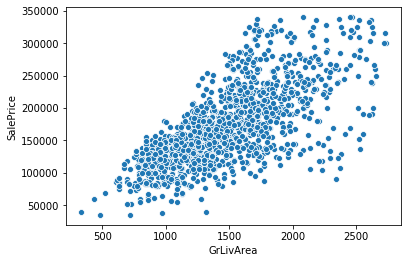

In [47]:
#Check the graphic again

#create scatterplot for train['GrLivArea'], train['SalePrice']
sns.scatterplot(x=df_train_new_g['GrLivArea'],y=df_train_new_s['SalePrice'])
plt.show()

#### observation:
  

### 1.9 c)Check the Outliers in box plot  for train['GrLivArea'].And your observation?

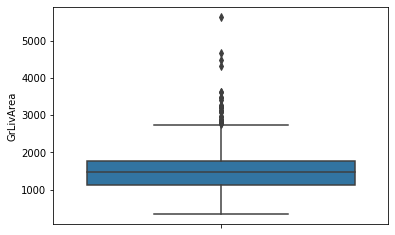

In [56]:
sns.boxplot(y=df_train['GrLivArea'])
plt.show()

### 1.9 d)Check Again the Outliers in box plot  for train['GrLivArea'].And your observation?

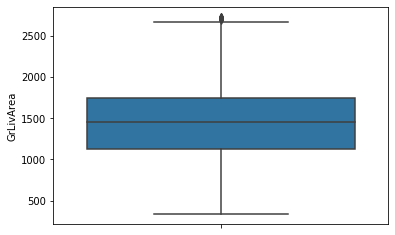

In [57]:
sns.boxplot(y=df_train_new_g['GrLivArea'])
plt.show()

## 1.10 Checking the skeweness for saleprice.And your observation?

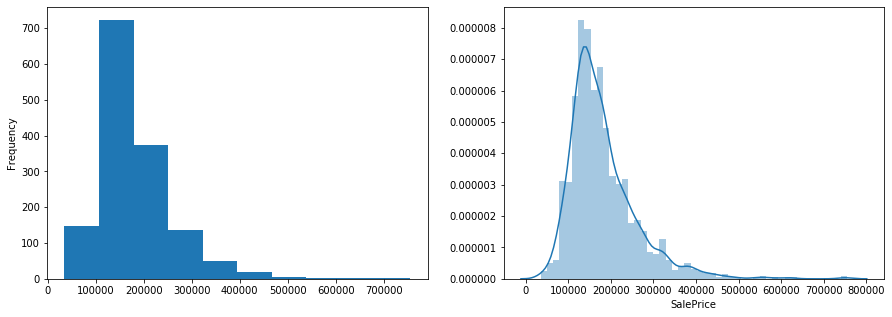

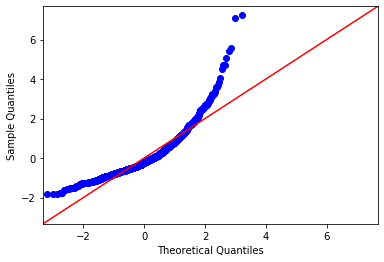

In [66]:
import statsmodels.api as sm

# create histogram for saleprice
f,ax=plt.subplots(1,2,figsize=(15,5))
df_train['SalePrice'].plot(kind='hist',ax=ax[0])
sns.distplot(df_train['SalePrice'],ax=ax[1])
sm.qqplot(df_train['SalePrice'],fit=True,line='45')
plt.show()
# Get the fitted parameters used by the function

#Now plot the distribution

#Get also the QQ-plot


### observation:


### 1.10 a) Apply Log-transformation of the target variable.And your observation?

In [63]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train['sales_log']=np.log(df_train['SalePrice'])
df_train[['sales_log','SalePrice']]

,sales_log,SalePrice
0,12.247694,208500
1,12.109011,181500
2,12.317167,223500
3,11.849398,140000
4,12.429216,250000
...,...,...
1455,12.072541,175000
1456,12.254863,210000
1457,12.493130,266500
1458,11.864462,142125


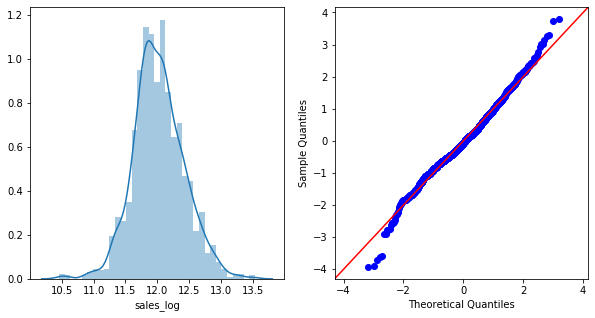

In [68]:
#Check the new distribution 
f,ax=plt.subplots(1,2,figsize=(10,5))

# Get the fitted parameters used by the function
sns.distplot(df_train['sales_log'],ax=ax[0])

#Now plot the distribution
sm.qqplot(df_train['sales_log'],fit=True,line='45',ax=ax[1])
plt.show()
#Get also the QQ-plot


#### observation:


### 1.11 concatenate the train and test data in the same dataframe

In [214]:
#all_data = pd.concat
all_data=pd.concat([df_train,df_test])
all_data.head()

/Users/rahul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,sales_log
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,0,Pave,8,856.0,AllPub,0,2003,2003,2008,12.247694
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,12.109011
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0,Pave,6,920.0,AllPub,0,2001,2002,2008,12.317167
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0,Pave,7,756.0,AllPub,0,1915,1970,2006,11.849398
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,12.429216


In [215]:
# Drop the SalePrice
all_data.drop(columns=['SalePrice'],inplace=True)

### 1.12 Cecking the all Missing Data?

In [75]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [76]:
all_data.isnull().sum()

1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
Alley           2721
BedroomAbvGr       0
                ... 
WoodDeckSF         0
YearBuilt          0
YearRemodAdd       0
YrSold             0
sales_log       1459
Length: 81, dtype: int64

### 1.13 plot the missing values using barplot?

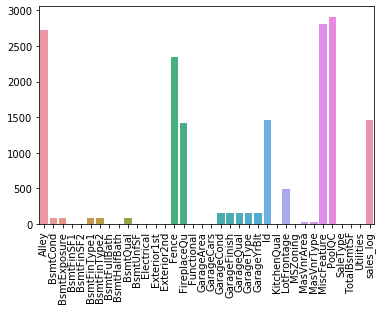

In [105]:
#create subplots
values=[]
labels=[]
for a in all_data.isnull().sum().index:
    if all_data.isnull().sum()[a]>0:
        values.append(all_data.isnull().sum()[a])
        labels.append(a)
#create barplot for all missing values
sns.barplot(x=labels,y=values)
plt.xticks(rotation='90')
plt.show()


### 1.14 check the Data Correlation using heatmap.And your observation?

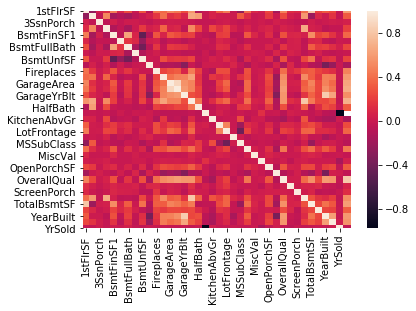

In [89]:
#Correlation map to see how features are correlated with SalePrice
sns.heatmap(all_data.corr())
plt.show()

#### observation:
   

#### 1.15 Imputing missing values

#### PoolQC : 
data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

In [173]:
all_data['PoolQC'].fillna('No Poll',inplace=True)


#### MiscFeature : 
data description says NA means "no misc feature"

In [174]:
all_data['MiscFeature'].fillna('No Misc feature',inplace=True)


#### Alley : 
data description says NA means "no alley access"

In [175]:
all_data['Alley'].fillna('no alley access',inplace=True)


Fence : 
data description says NA means "no fence"

### 1.16 Check remaining missing values if any 

In [176]:
labels

['Alley',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'Electrical',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'Id',
 'KitchenQual',
 'LotFrontage',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'PoolQC',
 'SaleType',
 'TotalBsmtSF',
 'Utilities',
 'sales_log']

In [177]:
# FireplaceQu : data description says NA means "no fireplace"
all_data['FireplaceQu'].fillna('no fireplace',inplace=True)
all_data['FireplaceQu'].head()

0    no fireplace
1              TA
2              TA
3              Gd
4              TA
Name: FireplaceQu, dtype: object

In [178]:
#LotFrontage : Since the area of each street connected to the house property most likely have a similar
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood


In [179]:
all_data['LotFrontage'].isnull().sum()

486

In [180]:
a=all_data.groupby(['Neighborhood']).agg({'LotFrontage':'median'})
df_nn['LotFrontage_median']=pd.DataFrame(data=a.values,index=a.index)


In [229]:
# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
all_data['GarageType'].fillna('None',inplace=True)
all_data['GarageFinish'].fillna('None',inplace=True)
all_data['GarageCond'].fillna('None',inplace=True)
all_data['GarageQual'].fillna('None',inplace=True)

all_data['GarageType'].isnull().sum()

0

In [230]:
# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
#all_data[['GarageYrBlt','GarageArea','GarageCars']].fillna(0,inplace=True)
all_data['GarageYrBlt'].fillna(0,inplace=True)
all_data['GarageArea'].fillna(0,inplace=True)
all_data['GarageCars'].fillna(0,inplace=True)


In [183]:
## BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement


In [231]:
all_data['BsmtFinSF1'].fillna(0,inplace=True)
all_data['BsmtFinSF2'].fillna(0,inplace=True)
all_data['BsmtUnfSF'].fillna(0,inplace=True)
all_data['TotalBsmtSF'].fillna(0,inplace=True)
all_data['BsmtHalfBath'].fillna(0,inplace=True)
all_data['BsmtFullBath'].fillna(0,inplace=True)





In [185]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.


In [233]:
all_data['MasVnrArea'].fillna(0,inplace=True)
all_data['MasVnrType'].fillna('None',inplace=True)

In [234]:
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
all_data['MSZoning'].fillna('RL',inplace=True)


In [235]:
#Functional : data description says NA means typical
all_data['Functional'].fillna('typical',inplace=True)


In [236]:
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data['Electrical'].fillna('SBrkr',inplace=True)


In [237]:
#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
all_data['KitchenQual'].fillna('TA',inplace=True)


In [238]:
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
all_data['Exterior1st'].fillna('VinylSd',inplace=True)


In [239]:
#SaleType : Fill in again with most frequent which is "WD"
all_data['Exterior2nd'].fillna('VinylSd',inplace=True)


In [240]:
#MSSubClass : Na most likely means No building class. We can replace missing values with None
all_data['MSSubClass'].fillna('None',inplace=True)


### 1.17 Check again remaining missing values if any.And your observation?

In [241]:

all_data.isnull().sum()

1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
Alley           2721
BedroomAbvGr       0
                ... 
WoodDeckSF         0
YearBuilt          0
YearRemodAdd       0
YrSold             0
sales_log       1459
Length: 81, dtype: int64

#### observation:
    

# 1.18 features engeneering

#### 1.18 a) Transforming some numerical variables that are really categorical

In [242]:
all_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [243]:
#MSSubClass=The building class
d=pd.get_dummies(all_data[['MSSubClass','OverallCond','MoSold','YrSold']],drop_first=True)

#Changing OverallCond into a categorical variable


#Year and month sold are transformed into categorical features.
d.head()


,MSSubClass,OverallCond,MoSold,YrSold
0,60,5,2,2008
1,20,8,5,2007
2,60,5,9,2008
3,70,5,2,2006
4,60,5,12,2008


#### 1.8b) label Encoding some categorical variables that may contain information in their ordering set

In [244]:

# process columns, apply LabelEncoder to categorical features

# shape        


### 1.19 Introduction to Test and Train


In [134]:
from sklearn.model_selection import train_test_split

PermissionError: [Errno 13] Permission denied: '/Users/rahul/.local/lib/python3.7/site-packages'

### 1.20 Extract the independent variable X and dependent variable Y?

In [ ]:
x=all_data.iloc[:,:-1] # all the columns except last column
y=all_data.iloc[:,-1] # last column
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

### 1.21 Split the data into train and test set(70/30)?

# The End